# Modeling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score 

import pickle

In [37]:
train_df = pd.read_csv('../data/processed/fraudTrain.csv')
train_df.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,is_fraud,trans_year,trans_month,trans_day,trans_hour,trans_minute,trans_second,dob_year,dob_month,dob_day
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,0,2019,1,1,0,0,18,1988,3,9
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,0,2019,1,1,0,0,44,1978,6,21
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,0,2019,1,1,0,0,51,1962,1,19
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,0,2019,1,1,0,1,16,1967,1,12
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,0,2019,1,1,0,3,6,1986,3,28


In [ ]:
# Encode categorical data

encoder = LabelEncoder()
train_df["merchant"] = encoder.fit_transform(train_df["merchant"])
train_df["category"] = encoder.fit_transform(train_df["category"])
train_df["gender"] = encoder.fit_transform(train_df["gender"])
train_df["job"] = encoder.fit_transform(train_df["job"])

In [ ]:
# Drop unimportant features

train_df.drop(columns=['cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time','trans_year','trans_month','trans_day','trans_hour','trans_minute','trans_second','dob_year','dob_month','dob_day'],inplace=True)
train_df.head(5)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,514,8,4.97,0,36.0788,-81.1781,3495,370,1325376018,36.011293,-82.048315,0
1,241,4,107.23,0,48.8878,-118.2105,149,428,1325376044,49.159047,-118.186462,0
2,390,0,220.11,1,42.1808,-112.2620,4154,307,1325376051,43.150704,-112.154481,0
3,360,2,45.00,1,46.2306,-112.1138,1939,328,1325376076,47.034331,-112.561071,0
4,297,9,41.96,1,38.4207,-79.4629,99,116,1325376186,38.674999,-78.632459,0


In [ ]:
# Split train and test data

X = train_df.drop(columns=['is_fraud'], inplace = False)
y = train_df['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.001, 
    stratify=y, 
    random_state=42
)

## Support Vector Classifier

In [ ]:
svc = SVC(random_state= 42)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
accuracy

0.9938319198149576

## Logistic Regression

In [ ]:
lr = LogisticRegression(random_state= 42)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
accuracy

0.9938319198149576

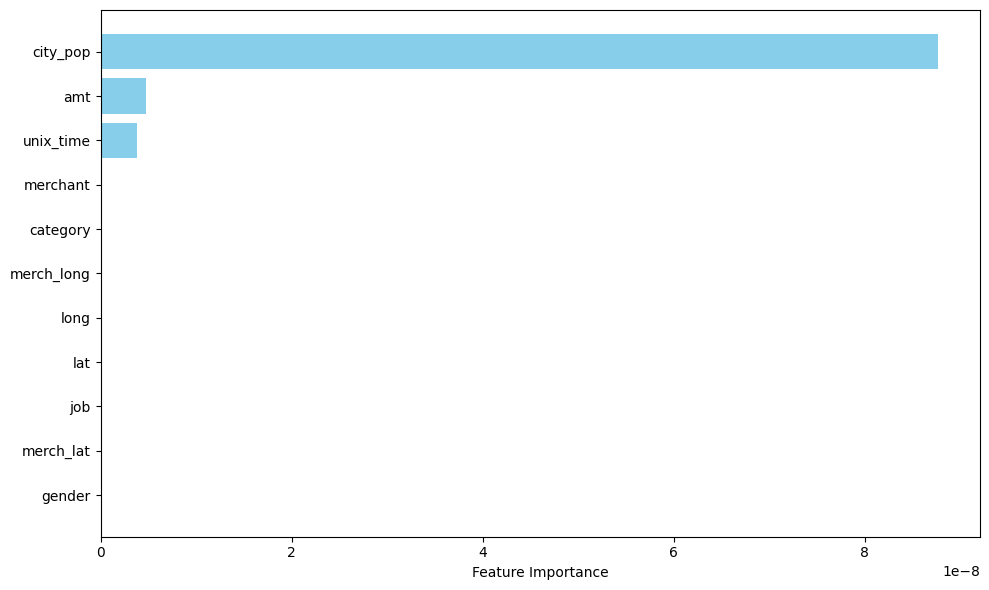

In [ ]:
# Calculate feature importance

coefs = lr.coef_.flatten()

importance_dict = pd.DataFrame({
    'feature': X_train.columns,
    'importance': np.abs(coefs)
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_dict['feature'], importance_dict['importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

## Decision Tree

In [ ]:
dtc = DecisionTreeClassifier(random_state= 42)
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
accuracy

0.9953739398612182

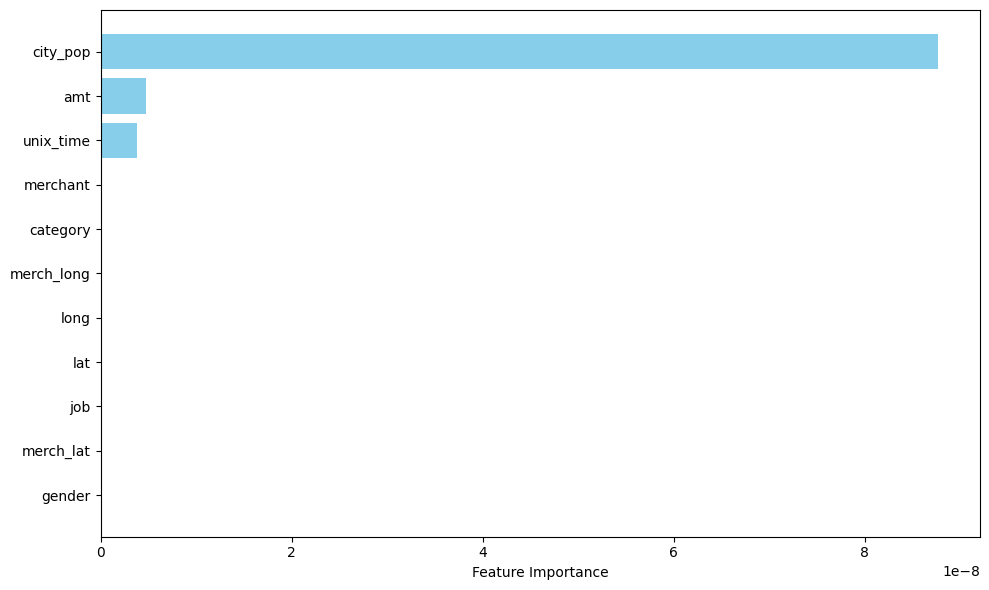

In [ ]:
# Calculate feature importance

importance_dict = pd.DataFrame({
    'feature': X_train.columns,
    'importance': dtc.feature_importances_
}).sort_values(by='importance', ascending=False)

importance_dict = pd.DataFrame({
    'feature': X_train.columns,
    'importance': np.abs(coefs)
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_dict['feature'], importance_dict['importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

## Random Forest

In [ ]:
rfc = RandomForestClassifier(random_state= 42)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
accuracy

0.9976869699306091

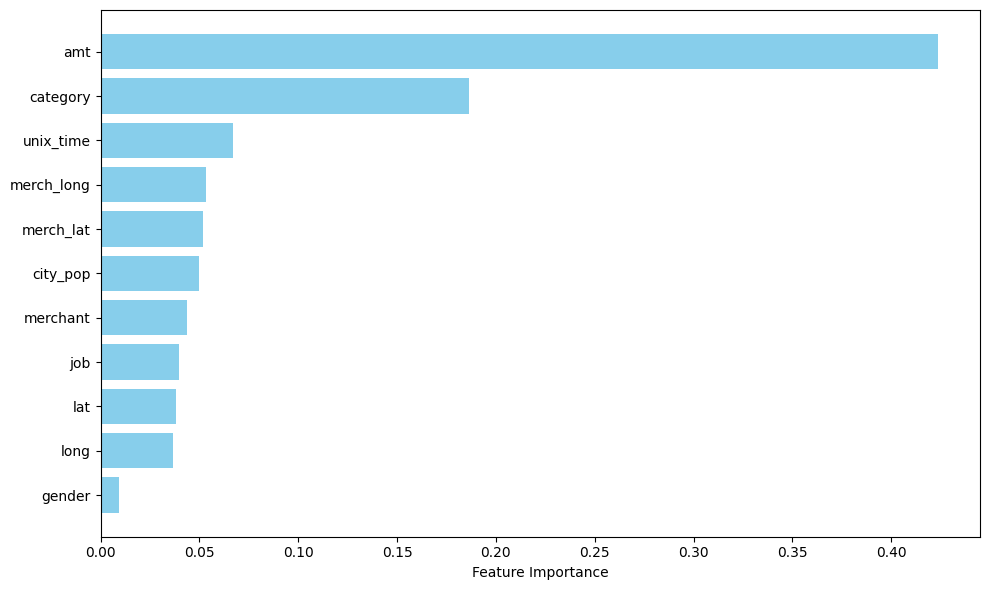

In [ ]:
# Calculate feature importance

importance_dict = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rfc.feature_importances_
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_dict['feature'], importance_dict['importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

## Pickle

In [ ]:
# Save fitted model using pickle

with open('../notebooks/models/svc.pkl', 'wb') as f:
    pickle.dump(svc, f)

with open('../notebooks/models/lr.pkl', 'wb') as f:
    pickle.dump(lr, f)

with open('../notebooks/models/dtc.pkl', 'wb') as f:
    pickle.dump(dtc, f)

with open('../notebooks/models/rfc.pkl', 'wb') as f:
    pickle.dump(rfc, f)